[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Saving Eminem (3).csv to Eminem (3) (1).csv


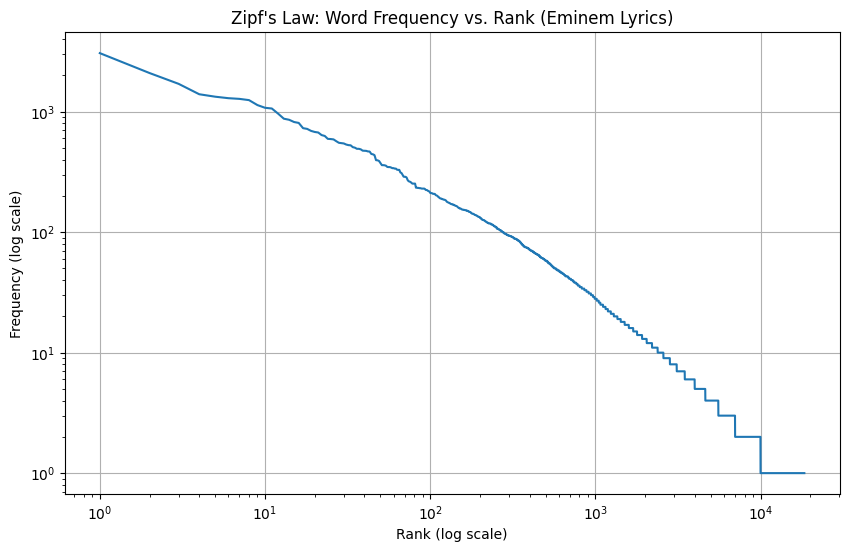

In [8]:
!pip install matplotlib pandas nltk --quiet

import pandas as pd
import matplotlib.pyplot as plt
import nltk
from collections import Counter
import re
from nltk.corpus import stopwords

nltk.download('stopwords')

from google.colab import files
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)), delimiter=';')

def preprocess(text):
    text = text.lower()
    words = re.findall(r'\b[a-z]+\b', text)
    stop_words = set(stopwords.words('english'))
    return [word for word in words if word not in stop_words]

all_words = []
for text in df['Lyric'].dropna():
    all_words.extend(preprocess(text))
word_freq = Counter(all_words)
most_common = word_freq.most_common()

ranks = range(1, len(most_common) + 1)
frequencies = [freq for word, freq in most_common]

plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies)
plt.title("Zipf's Law: Word Frequency vs. Rank (Eminem Lyrics)")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.grid(True)
plt.show()
